## Import images, set dir variables

In [1]:
import os, shutil

In [2]:
original_dataset_dir = './data-src/cats_and_dogs/train'

base_dir = './cats_and_dogs_small'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Network 1 : Conv + Dense from scratch

In [5]:
image_height = 150
image_width = 150

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001), # try also lr=1e-4
    loss=losses.binary_crossentropy, 
    metrics=[metrics.binary_accuracy])

In [7]:
batch_size = 20

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(image_height, image_width), 
                                                    batch_size=batch_size, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(image_height, image_width), 
                                                        batch_size=batch_size, 
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [9]:
total_num_samples = len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))
total_num_val_samples = len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir))

history = model.fit_generator(train_generator, 
                              steps_per_epoch=total_num_samples/batch_size, 
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=total_num_val_samples/batch_size)

Epoch 1/30
100/100 [==============================] - 14s - loss: 0.7310 - binary_accuracy: 0.5265 - val_loss: 0.6859 - val_binary_accuracy: 0.5530
Epoch 2/30
100/100 [==============================] - 6s - loss: 0.6921 - binary_accuracy: 0.5835 - val_loss: 0.6311 - val_binary_accuracy: 0.6700
Epoch 3/30
100/100 [==============================] - 6s - loss: 0.6507 - binary_accuracy: 0.6555 - val_loss: 0.6812 - val_binary_accuracy: 0.6110
Epoch 4/30
100/100 [==============================] - 6s - loss: 0.6018 - binary_accuracy: 0.6910 - val_loss: 0.5946 - val_binary_accuracy: 0.6830
Epoch 5/30
100/100 [==============================] - 6s - loss: 0.5487 - binary_accuracy: 0.7235 - val_loss: 0.5640 - val_binary_accuracy: 0.7170
Epoch 6/30
100/100 [==============================] - 6s - loss: 0.5036 - binary_accuracy: 0.7485 - val_loss: 0.6179 - val_binary_accuracy: 0.7070
Epoch 7/30
100/100 [==============================] - 6s - loss: 0.4421 - binary_accuracy: 0.7950 - val_loss: 0.6862 

In [13]:
model.save('cats_and_dogs_small_1.h5')

In [10]:
history.history.keys()

dict_keys(['val_loss', 'loss', 'val_binary_accuracy', 'binary_accuracy'])

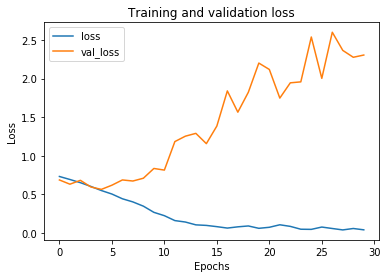

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

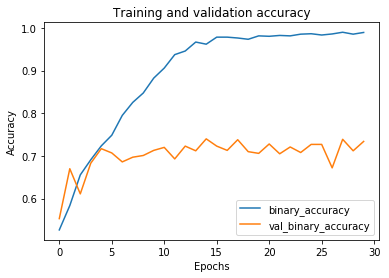

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['binary_accuracy'], label='binary_accuracy')
plt.plot(history.epoch, history.history['val_binary_accuracy'], label='val_binary_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Network 2 : Conv + Dense from scratch with data augmentation

In [6]:
# too few data, make up more by data augmentation

image_height = 150
image_width = 150
batch_size = 32

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(image_height, image_width), 
                                                    batch_size=batch_size, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(image_height, image_width), 
                                                        batch_size=batch_size, 
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001), # try also lr=1e-4
    loss=losses.binary_crossentropy, 
    metrics=[metrics.binary_accuracy])

In [26]:
import math

total_num_samples = len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))
total_num_val_samples = len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir))

history = model.fit_generator(train_generator, 
                              steps_per_epoch=math.ceil(total_num_samples/batch_size), 
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=math.ceil(total_num_val_samples/batch_size))

Epoch 1/100
63/63 [==============================] - 12s - loss: 0.7415 - binary_accuracy: 0.4941 - val_loss: 0.6915 - val_binary_accuracy: 0.5030
Epoch 2/100
63/63 [==============================] - 11s - loss: 0.6950 - binary_accuracy: 0.5362 - val_loss: 0.6770 - val_binary_accuracy: 0.6400
Epoch 3/100
63/63 [==============================] - 11s - loss: 0.6957 - binary_accuracy: 0.5828 - val_loss: 1.2011 - val_binary_accuracy: 0.5010
Epoch 4/100
63/63 [==============================] - 11s - loss: 0.6901 - binary_accuracy: 0.5898 - val_loss: 0.6569 - val_binary_accuracy: 0.6510
Epoch 5/100
63/63 [==============================] - 11s - loss: 0.6601 - binary_accuracy: 0.6176 - val_loss: 0.6938 - val_binary_accuracy: 0.5620
Epoch 6/100
63/63 [==============================] - 10s - loss: 0.6537 - binary_accuracy: 0.6230 - val_loss: 0.6295 - val_binary_accuracy: 0.6440
Epoch 7/100
63/63 [==============================] - 10s - loss: 0.6926 - binary_accuracy: 0.6453 - val_loss: 0.6110 -

In [27]:
model.save('cats_and_dogs_small_2.h5')

In [28]:
history.history.keys()

dict_keys(['val_loss', 'loss', 'val_binary_accuracy', 'binary_accuracy'])

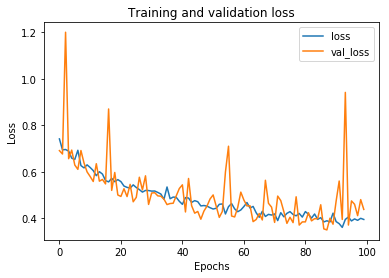

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

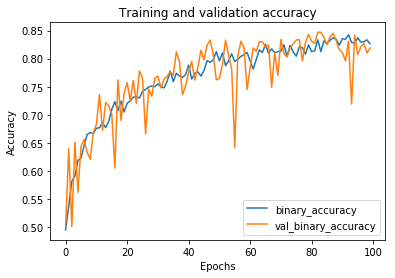

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['binary_accuracy'], label='binary_accuracy')
plt.plot(history.epoch, history.history['val_binary_accuracy'], label='val_binary_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Network 3 : Pre-trained Conv + Dense with data augmentation (expensive)

In [57]:
image_height = 150
image_width = 150
batch_size = 32

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(image_height, image_width), 
                                                    batch_size=batch_size, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(image_height, image_width), 
                                                        batch_size=batch_size, 
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [78]:
from keras import layers
from keras import models
from keras.applications import VGG16


model = models.Sequential()

conv_base = VGG16(include_top=False, weights='imagenet', input_shape=(image_height, image_width, 3))
# conv_base.summary()
model.add(conv_base)

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_17 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [79]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(
    optimizer=optimizers.RMSprop(lr=2e-5), # 2e-5
    loss=losses.binary_crossentropy, 
    metrics=[metrics.binary_accuracy])

In [80]:
import math

total_num_samples = len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))
total_num_val_samples = len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir))

history = model.fit_generator(train_generator, 
                              steps_per_epoch=math.ceil(total_num_samples/batch_size), 
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=math.ceil(total_num_val_samples/batch_size),
                              verbose=0)

In [74]:
model.save('cats_and_dogs_small_3.h5')

In [75]:
history.history.keys()

dict_keys(['val_loss', 'loss', 'val_binary_accuracy', 'binary_accuracy'])

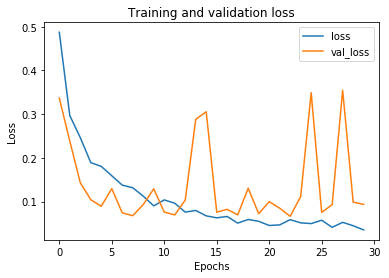

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

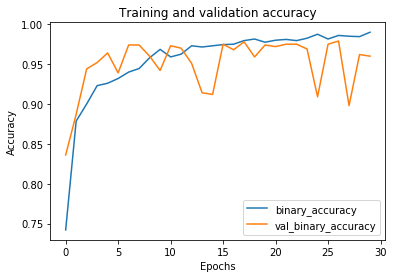

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['binary_accuracy'], label='binary_accuracy')
plt.plot(history.epoch, history.history['val_binary_accuracy'], label='val_binary_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Go even further
It’s only possible to fine-tune the top layers of the convolutional base once the classifier on top <b>has already been trained</b>

In [83]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
        
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [84]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(
    optimizer=optimizers.RMSprop(lr=1e-5),
    loss=losses.binary_crossentropy, 
    metrics=[metrics.binary_accuracy])

In [85]:
# train_generator and validation_generator are the data-augmented ones

import math

total_num_samples = len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))
total_num_val_samples = len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir))

history = model.fit_generator(train_generator, 
                              steps_per_epoch=math.ceil(total_num_samples/batch_size), 
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=math.ceil(total_num_val_samples/batch_size))

Epoch 1/30
63/63 [==============================] - 12s - loss: 0.0153 - binary_accuracy: 0.9945 - val_loss: 0.0875 - val_binary_accuracy: 0.9780
Epoch 2/30
63/63 [==============================] - 11s - loss: 0.0107 - binary_accuracy: 0.9960 - val_loss: 0.0728 - val_binary_accuracy: 0.9790
Epoch 3/30
63/63 [==============================] - 11s - loss: 0.0084 - binary_accuracy: 0.9970 - val_loss: 0.1333 - val_binary_accuracy: 0.9770
Epoch 4/30
63/63 [==============================] - 11s - loss: 0.0110 - binary_accuracy: 0.9970 - val_loss: 0.0822 - val_binary_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 11s - loss: 0.0057 - binary_accuracy: 0.9975 - val_loss: 0.0683 - val_binary_accuracy: 0.9800
Epoch 6/30
63/63 [==============================] - 11s - loss: 0.0064 - binary_accuracy: 0.9970 - val_loss: 0.1155 - val_binary_accuracy: 0.9790
Epoch 7/30
63/63 [==============================] - 11s - loss: 0.0096 - binary_accuracy: 0.9960 - val_loss: 0.0991 - val_bi

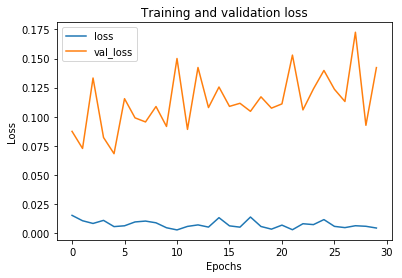

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

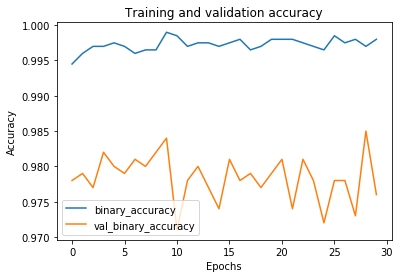

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['binary_accuracy'], label='binary_accuracy')
plt.plot(history.epoch, history.history['val_binary_accuracy'], label='val_binary_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [88]:
model.save('cats_and_dogs_small_4.h5')

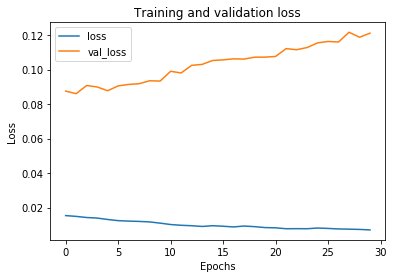

In [89]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous_point = smoothed_points[-1]
            smoothed_points.append(previous_point * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, smooth_curve(history.history['loss']), label='loss')
plt.plot(history.epoch, smooth_curve(history.history['val_loss']), label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

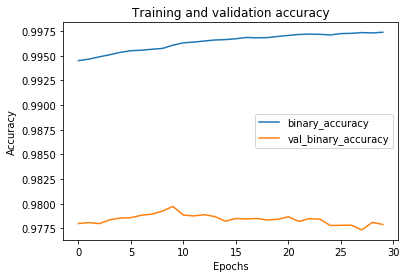

In [90]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous_point = smoothed_points[-1]
            smoothed_points.append(previous_point * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, smooth_curve(history.history['binary_accuracy']), label='binary_accuracy')
plt.plot(history.epoch, smooth_curve(history.history['val_binary_accuracy']), label='val_binary_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Apply the model to test set to evaluate its performance

In [92]:
image_height = 150
image_width = 150
batch_size = 20

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='binary')

import math

total_num_samples = len(os.listdir(test_cats_dir)) + len(os.listdir(test_dogs_dir))
test_loss, test_acc = model.evaluate_generator(test_generator, steps=math.ceil(total_num_samples/batch_size))
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.967999994755
